# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

from seaborn import load_dataset
import graphviz
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

%matplotlib inline

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [4]:
X = df.drop(['Unnamed: 0', 'id_cliente'], axis=1)
X

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,2016-03-01,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,2016-03-01,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,2016-03-01,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  bool   
 3   posse_de_imovel        15000 non-null  bool   
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          12427 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 1.3+ MB


In [6]:
#1
X_train, X_test = train_test_split(X, train_size=0.75, random_state=2360873)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

X_train: (11250, 13)
X_test: (3750, 13)


In [7]:
#2
X_1 = patsy.dmatrices('''np.log(renda) ~ C(data_ref)
                    + C(sexo)
                    + C(posse_de_veiculo)
                    + C(posse_de_imovel)
                    + qtd_filhos
                    + C(tipo_renda)
                    + C(educacao, Treatment(2))
                    + C(estado_civil)
                    + C(tipo_residencia, Treatment(1))
                    + idade
                    + tempo_emprego
                    + qt_pessoas_residencia
                    + 1''', X_test)
#criação de dummyes

In [8]:
#[0, 0.001, 0.005, 0.01, 0.05, 0.1]
x1 = smf.ols(X_1, data = X_test).fit_regularized(method = 'elastic_net'
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0)

x1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     42.70
Date:                Mon, 06 May 2024   Prob (F-statistic):          2.70e-250
Time:                        17:34:48   Log-Likelihood:                -3426.0
No. Observations:                3108   AIC:                             6930.
Df Residuals:                    3070   BIC:                             7166.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.2559      0.341     21.258      0.000       6.587       7.925
C(data_ref)[T.2015-02-01]                             0.0624      0.072      0.867      0.386      -0.079       0.204
C(data_ref)[T.2015-03-01]                             0.0229      0.072      0.317      0.752      -0.119       0.164
C(data_ref)[T.2015-04-01]                             0.0213      0.071      0.300      0.764      -0.118       0.160
C(data_ref)[T.2015-05-01]                            -0.0676      0.073     -0.931      0.352      -0.210       0.075
C(data_ref)[T.2015-06-01]                             0.0520      0.074      0.702      0.483      -0.093       0.197
C(data_ref)[T.2015-07-01]                             0.0516      0.072      0.716      0.474      -0.090       0.193
C(data_ref)[T.2015-08-01]                             0.0086      0.073      0.117      0.907      -0.135       0.152
C(data_ref)[T.2015-09-01]                             0.0417      0.072      0.577      0.564      -0.100       0.184
C(data_ref)[T.2015-10-01]                             0.0276      0.073      0.379      0.705      -0.115       0.171
C(data_ref)[T.2015-11-01]                            -0.0109      0.071     -0.154      0.878      -0.151       0.129
C(data_ref)[T.2015-12-01]                             0.0009      0.073      0.012      0.991      -0.143       0.145
C(data_ref)[T.2016-01-01]                             0.0026      0.074      0.035      0.972      -0.143       0.149
C(data_ref)[T.2016-02-01]                            -0.0327      0.072     -0.457      0.648      -0.173       0.108
C(data_ref)[T.2016-03-01]                            -0.0398      0.073     -0.549      0.583      -0.182       0.102
C(sexo)[T.M]                                          0.7420      0.030     24.957      0.000       0.684       0.800
C(posse_de_veiculo)[T.True]                           0.0237      0.029      0.820      0.412      -0.033       0.080
C(posse_de_imovel)[T.True]                            0.0887      0.028      3.119      0.002       0.033       0.144
C(tipo_renda)[T.Empresário]                           0.1685      0.031      5.504      0.000       0.108       0.229
C(tipo_renda)[T.Pensionista]                         -0.0584      0.425     -0.137      0.891      -0.892       0.776
C(tipo_renda)[T.Servidor público]                     0.0150      0.045      0.334      0.739      -0.073       0.103
C(educacao, Treatment(2))[T.Primário]                 0.0602      0.148      0.406      0.685      -0.231       0.351
C(educacao, Treatment(2))[T.Pós graduação]            0.2764      0.261      1.057      0.291      -0.236       0.789
C(educacao, Tre

In [9]:
#[0, 0.001, 0.005, 0.01, 0.05, 0.1]
x2 = smf.ols(X_1, data = X_test).fit_regularized(method = 'elastic_net'
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.001)

x2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     77.26
Date:                Mon, 06 May 2024   Prob (F-statistic):          5.41e-264
Time:                        17:34:50   Log-Likelihood:                -3429.0
No. Observations:                3108   AIC:                             6902.
Df Residuals:                    3087   BIC:                             7035.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.5142      0.167     45.112      0.000       7.188       7.841
C(data_ref)[T.2015-02-01]                             0.0614      0.053      1.147      0.252      -0.044       0.166
C(data_ref)[T.2015-03-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-04-01]                             0.0163      0.052      0.314      0.754      -0.086       0.119
C(data_ref)[T.2015-05-01]                            -0.0717      0.055     -1.316      0.188      -0.179       0.035
C(data_ref)[T.2015-06-01]                             0.0514      0.056      0.913      0.361      -0.059       0.162
C(data_ref)[T.2015-07-01]                             0.0477      0.053      0.892      0.373      -0.057       0.153
C(data_ref)[T.2015-08-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-09-01]                             0.0383      0.054      0.712      0.476      -0.067       0.144
C(data_ref)[T.2015-10-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-11-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-12-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2016-01-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2016-02-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2016-03-01]                            -0.0421      0.054     -0.777      0.437      -0.148       0.064
C(sexo)[T.M]                                          0.7478      0.028     26.530      0.000       0.693       0.803
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                            0.0864      0.028      3.085      0.002       0.031       0.141
C(tipo_renda)[T.Empresário]                           0.1690      0.030      5.693      0.000       0.111       0.227
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Tre

In [10]:
#[0, 0.001, 0.005, 0.01, 0.05, 0.1]
x3 = smf.ols(X_1, data = X_test).fit_regularized(method = 'elastic_net'
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.005)

x3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     254.6
Date:                Mon, 06 May 2024   Prob (F-statistic):          2.53e-265
Time:                        17:34:52   Log-Likelihood:                -3463.1
No. Observations:                3108   AIC:                             6940.
Df Residuals:                    3102   BIC:                             6983.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.3369      0.061    120.048      0.000       7.217       7.457
C(data_ref)[T.2015-02-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-03-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-04-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-05-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-06-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-07-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-08-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-09-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-10-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-11-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-12-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2016-01-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2016-02-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2016-03-01]                                  0          0        nan        nan           0           0
C(sexo)[T.M]                                          0.7329      0.028     26.126      0.000       0.678       0.788
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                                 0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                                0          0        nan        nan           0           0
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Tre

In [11]:
#[0, 0.001, 0.005, 0.01, 0.05, 0.1]
x4 = smf.ols(X_1, data = X_test).fit_regularized(method = 'elastic_net'
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.01)

x4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     307.0
Date:                Mon, 06 May 2024   Prob (F-statistic):          1.46e-267
Time:                        17:34:53   Log-Likelihood:                -3460.9
No. Observations:                3108   AIC:                             6934.
Df Residuals:                    3103   BIC:                             6970.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.2717      0.062    117.676      0.000       7.151       7.393
C(data_ref)[T.2015-02-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-03-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-04-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-05-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-06-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-07-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-08-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-09-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-10-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-11-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-12-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2016-01-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2016-02-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2016-03-01]                                  0          0        nan        nan           0           0
C(sexo)[T.M]                                          0.7376      0.028     26.352      0.000       0.683       0.792
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                            0.1005      0.028      3.610      0.000       0.046       0.155
C(tipo_renda)[T.Empresário]                                0          0        nan        nan           0           0
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Tre

In [12]:
#[0, 0.001, 0.005, 0.01, 0.05, 0.1]
x5 = smf.ols(X_1, data = X_test).fit_regularized(method = 'elastic_net'
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.05)

x5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     500.6
Date:                Mon, 06 May 2024   Prob (F-statistic):          2.55e-265
Time:                        17:34:54   Log-Likelihood:                -3472.3
No. Observations:                3108   AIC:                             6953.
Df Residuals:                    3105   BIC:                             6977.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.4948      0.024    318.662      0.000       7.449       7.541
C(data_ref)[T.2015-02-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-03-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-04-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-05-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-06-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-07-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-08-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-09-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-10-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-11-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-12-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2016-01-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2016-02-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2016-03-01]                                  0          0        nan        nan           0           0
C(sexo)[T.M]                                          0.7277      0.028     26.050      0.000       0.673       0.782
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                                 0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                                0          0        nan        nan           0           0
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Tre

In [13]:
#[0, 0.001, 0.005, 0.01, 0.05, 0.1]
x6 = smf.ols(X_1, data = X_test).fit_regularized(method = 'elastic_net'
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.1)

x6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     379.0
Date:                Mon, 06 May 2024   Prob (F-statistic):          4.63e-266
Time:                        17:34:55   Log-Likelihood:                -3467.4
No. Observations:                3108   AIC:                             6945.
Df Residuals:                    3104   BIC:                             6975.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.3202      0.060    121.129      0.000       7.202       7.439
C(data_ref)[T.2015-02-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-03-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-04-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-05-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-06-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-07-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-08-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-09-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-10-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-11-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2015-12-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2016-01-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2016-02-01]                                  0          0        nan        nan           0           0
C(data_ref)[T.2016-03-01]                                  0          0        nan        nan           0           0
C(sexo)[T.M]                                          0.7367      0.028     26.271      0.000       0.682       0.792
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                                 0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                                0          0        nan        nan           0           0
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Tre

- O modelo x1 com alpha = 0.0 é o melhor

In [14]:
#3
#[0, 0.001, 0.005, 0.01, 0.05, 0.1]
X_test['log_renda']=np.log(X_test['renda'])

In [15]:
X_test['pred'] = x1.predict(X_test)
r = X_test[['pred', 'log_renda']].corr().iloc[0,1]
r**2

0.3457839218814344

In [16]:
X_test['pred1'] = x2.predict(X_test)
r = X_test[['pred1', 'log_renda']].corr().iloc[0,1]
r**2

0.3445053108109112

In [17]:
X_test['pred2'] = x3.predict(X_test)
r = X_test[['pred2', 'log_renda']].corr().iloc[0,1]
r**2

0.32995818806572713

In [18]:
X_test['pred2'] = x4.predict(X_test)
r = X_test[['pred2', 'log_renda']].corr().iloc[0,1]
r**2

0.3309295613720471

In [19]:
X_test['pred2'] = x5.predict(X_test)
r = X_test[['pred2', 'log_renda']].corr().iloc[0,1]
r**2

0.32599271084414394

In [20]:
X_test['pred2'] = x6.predict(X_test)
r = X_test[['pred2', 'log_renda']].corr().iloc[0,1]
r**2

0.3281188518502517

- O melhor é o modelo x1 com alpha = 0.0

In [21]:
#4
# Função para seleção de características stepwise
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval}')
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # backward step
        print("#############")
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval}')
        if not changed:
            break
    return included

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  bool   
 3   posse_de_imovel        15000 non-null  bool   
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          12427 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 1.3+ MB


In [23]:
X_train_a = X_train.dropna()

In [24]:
X_train_b = pd.get_dummies(X_train_a, columns=['data_ref','sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], dtype=int, drop_first=True)
X_train_b.head()


,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,data_ref_2015-02-01,data_ref_2015-03-01,data_ref_2015-04-01,data_ref_2015-05-01,data_ref_2015-06-01,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
4203,2,31,8.065753,4.0,21006.34,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9053,0,46,5.964384,2.0,9256.02,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1192,0,56,35.643836,1.0,10713.63,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
7324,0,47,9.589041,2.0,2764.40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
70,0,42,9.627397,2.0,8651.81,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
X_train_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9319 entries, 4203 to 13028
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               9319 non-null   object 
 1   sexo                   9319 non-null   object 
 2   posse_de_veiculo       9319 non-null   bool   
 3   posse_de_imovel        9319 non-null   bool   
 4   qtd_filhos             9319 non-null   int64  
 5   tipo_renda             9319 non-null   object 
 6   educacao               9319 non-null   object 
 7   estado_civil           9319 non-null   object 
 8   tipo_residencia        9319 non-null   object 
 9   idade                  9319 non-null   int64  
 10  tempo_emprego          9319 non-null   float64
 11  qt_pessoas_residencia  9319 non-null   float64
 12  renda                  9319 non-null   float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 891.9+ KB


In [26]:
X_train_b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9319 entries, 4203 to 13028
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   qtd_filhos                     9319 non-null   int64  
 1   idade                          9319 non-null   int64  
 2   tempo_emprego                  9319 non-null   float64
 3   qt_pessoas_residencia          9319 non-null   float64
 4   renda                          9319 non-null   float64
 5   data_ref_2015-02-01            9319 non-null   int64  
 6   data_ref_2015-03-01            9319 non-null   int64  
 7   data_ref_2015-04-01            9319 non-null   int64  
 8   data_ref_2015-05-01            9319 non-null   int64  
 9   data_ref_2015-06-01            9319 non-null   int64  
 10  data_ref_2015-07-01            9319 non-null   int64  
 11  data_ref_2015-08-01            9319 non-null   int64  
 12  data_ref_2015-09-01            9319 non-null   in

In [27]:
X_train_c = X_train_b.drop(['renda'], axis=1)
y_train_a = X_train_b['renda']

In [28]:
# Selecionando características usando o método stepwise
selected_features = stepwise_selection(X_train_c, y_train_a)

# Imprimindo as características selecionadas
print("Selected features:", selected_features)

Add  tempo_emprego with p-value 0.0
#############
Add  sexo_M with p-value 2.1166305994780032e-256
#############
Add  idade with p-value 2.7940065109145605e-06
#############
Add  educacao_Superior completo with p-value 1.5653672319459047e-06
#############
Add  tipo_renda_Empresário with p-value 0.0005033131955288787
#############
#############
Selected features: ['tempo_emprego', 'sexo_M', 'idade', 'educacao_Superior completo', 'tipo_renda_Empresário']


In [29]:
X_train_b.rename(columns = {'educacao_Superior completo':'educacao_Superior_completo'}, inplace=True)

In [30]:
z = smf.ols('''np.log(renda) ~   tempo_emprego +
                                        sexo_M +
                                        idade +
                                        educacao_Superior_completo +
                                        tipo_renda_Empresário''', data = X_train_b).fit()
z.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     1041.
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        17:35:03   Log-Likelihood:                -10161.
No. Observations:                9319   AIC:                         2.033e+04
Df Residuals:                    9313   BIC:                         2.038e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.1926      0.037    195.983      0.000       7.121       7.265
tempo_emprego                  0.0614      0.001     51.856      0.000       0.059       0.064
sexo_M                         0.8151      0.016     51.729      0.000       0.784       0.846
idade                          0.0054      0.001      6.317      0.000       0.004       0.007
educacao_Superior_completo     0.1295      0.015      8.368      0.000       0.099       0.160
tipo_renda_Empresário          0.1381      0.017      8.263      0.000       0.105       0.171
==============================================================================
Omnibus:                        0.617   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.735   Jarque-Bera (JB):                0.581
Skew:                           0.013   Prob(JB):                        0.748
Kurtosis:                       3.029   Cond. No.                         213.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
X_train_b['log_renda']=np.log(X_train_b['renda'])

In [32]:
X_train_b['pred_m'] = z.predict(X_train_b)
r = X_train_b[['pred_m', 'log_renda']].corr().iloc[0,1]
r**2

0.35846253681456924

- o modelo z com regularização e regressão possuem valores semelhantes ao stepwise, ficando equivalentes.

- #5
- Comparando todos os modelos mostrados anteriomente, a melhor escolha é o stepwise/modelo z.

In [33]:
#6
modelo_n = smf.ols('np.log(renda) ~  tempo_emprego + sexo_M + idade', data = X_train_b).fit()
modelo_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     1659.
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        17:35:03   Log-Likelihood:                -10235.
No. Observations:                9319   AIC:                         2.048e+04
Df Residuals:                    9315   BIC:                         2.051e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.3227      0.035    207.138      0.000       7.253       7.392
tempo_emprego     0.0605      0.001     50.994      0.000       0.058       0.063
sexo_M            0.8032      0.016     50.677      0.000       0.772       0.834
idade             0.0046      0.001      5.402      0.000       0.003       0.006
==============================================================================
Omnibus:                        0.986   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.948
Skew:                           0.018   Prob(JB):                        0.622
Kurtosis:                       3.033   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
modelo_o = smf.ols('np.log(renda) ~  tempo_emprego + I(tempo_emprego**2) + sexo_M + idade', data = X_train_b).fit()
modelo_o.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     1262.
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        17:35:03   Log-Likelihood:                -10212.
No. Observations:                9319   AIC:                         2.043e+04
Df Residuals:                    9314   BIC:                         2.047e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.2379      0.037    193.233      0.000       7.164       7.311
tempo_emprego             0.0788      0.003     26.528      0.000       0.073       0.085
I(tempo_emprego ** 2)    -0.0007      0.000     -6.719      0.000      -0.001      -0.000
sexo_M                    0.8019      0.016     50.713      0.000       0.771       0.833
idade                     0.0050      0.001      5.861      0.000       0.003       0.007
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.986
Skew:                           0.023   Prob(JB):                        0.611
Kurtosis:                       3.020   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Os modelos imaginados chegaram perto mas não foram melhores.

In [35]:
#7
regr1 = DecisionTreeRegressor(max_depth=8)
regr2 = DecisionTreeRegressor(max_depth=2)

regr1.fit(X_train_c, y_train_a)
regr2.fit(X_train_c, y_train_a)

DecisionTreeRegressor(max_depth=2)

In [36]:
train1 = regr1.predict(X_train_c)
train2 = regr2.predict(X_train_c)
print('Para base de treinamento:')
print('O mse com profundidade = 8, MSE=', mean_squared_error(y_train_a,train1))
print('O mse com profundidade = 2, MSE=', mean_squared_error(y_train_a,train2))

Para base de treinamento:
O mse com profundidade = 8, MSE= 26895817.283164315
O mse com profundidade = 2, MSE= 61779510.94027949


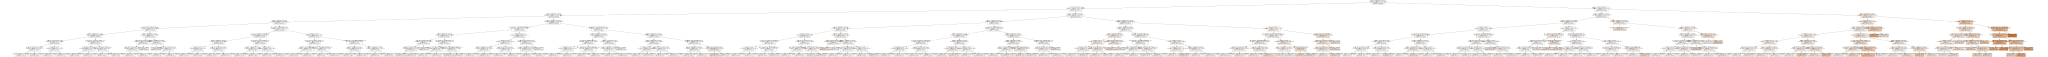

In [37]:
data = tree.export_graphviz(regr1, out_file=None,
                                feature_names=X_train_c.columns,
                                filled=True)

graph = graphviz.Source(data, format="png")
graph

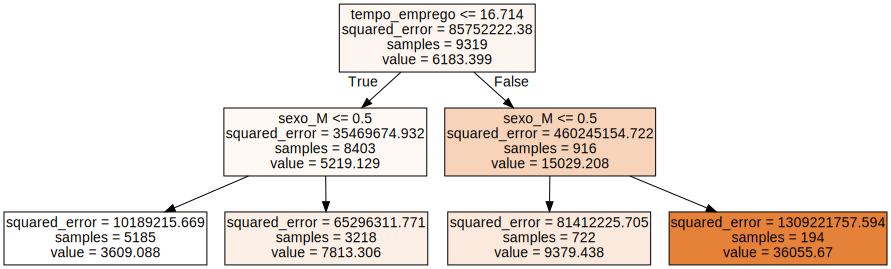

In [38]:
data = tree.export_graphviz(regr2, out_file=None,
                                feature_names=X_train_c.columns,
                                filled=True)

graph = graphviz.Source(data, format="png")
graph

In [39]:
#egr1.fit(X_train_c, y_train_a)
#egr2.fit(X_train_c, y_train_a)
path = regr1.cost_complexity_pruning_path(X_train_c, y_train_a)

Text(0, 0.5, 'Impureza total das folhas')

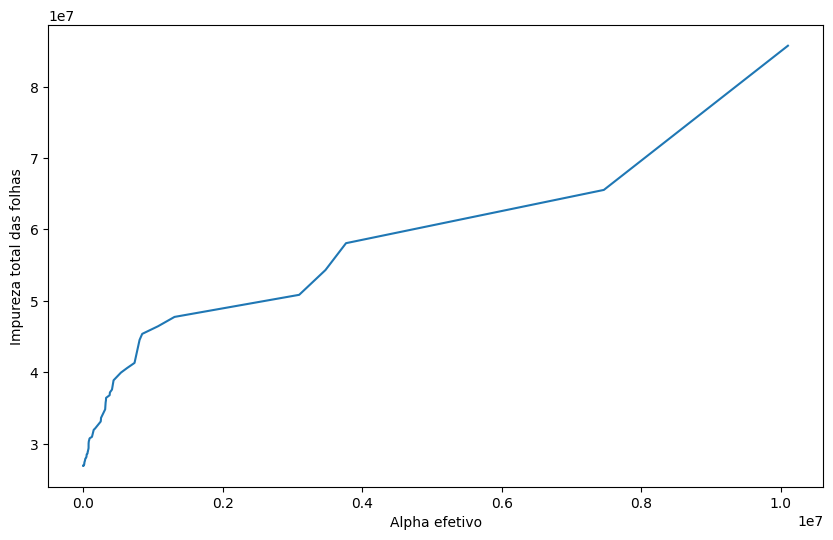

In [40]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [41]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_c, y_train_a)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

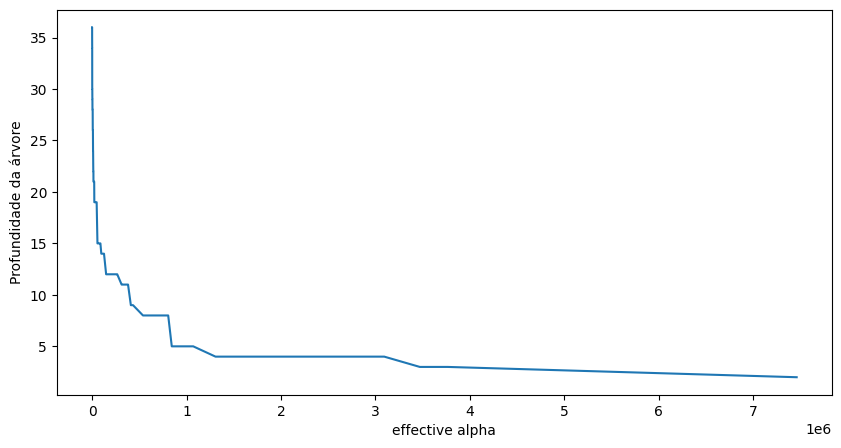

In [42]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  5))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

In [43]:
train_scores = [mean_squared_error(y_train_a, clf.predict(X_train_c)) for clf in clfs]

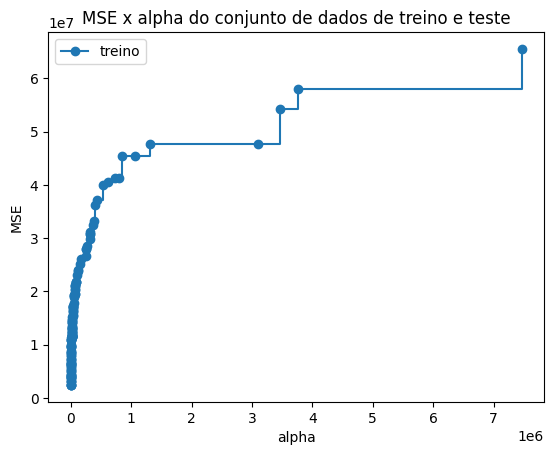

In [44]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [45]:
arvore_final = DecisionTreeRegressor (random_state=0, ccp_alpha=.5)
arvore_final.fit(X_train_c, y_train_a)

print(f'Profundidade: {arvore_final.tree_.max_depth}')
print(f'MSE na base de testes: {mean_squared_error(y_train_a , arvore_final.predict(X_train_c)):.2f}')

Profundidade: 36
MSE na base de testes: 2426726.81


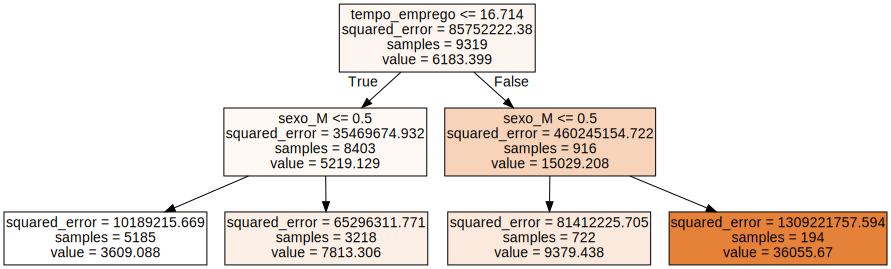

In [46]:
ata = tree.export_graphviz(regr1, out_file=None,
                                feature_names=X_train_c.columns,
                                filled=True)

graph = graphviz.Source(data, format="png")
graph